In [68]:
import numpy as np
import matplotlib.pyplot as plt
import random

n=10000

#binary channel
cost = [[0,1],[1,0]]
p0 = 0.8
p1 = 0.7

bit_stream = [ random.randint(0,1) for _ in range(n) ]
noisy_bit_stream = []

def add_noise(bit_stream, p0, p1):
    for bit in bit_stream:
        if bit == 0:
            if random.random() >p0:
                noisy_bit_stream.append(1)
            else:
                noisy_bit_stream.append(0)
        else:
            if random.random() >p1:
                noisy_bit_stream.append(0)
            else:
                noisy_bit_stream.append(1)

add_noise(bit_stream,p0,p1)

# print(bit_stream)
# print(noisy_bit_stream)
                

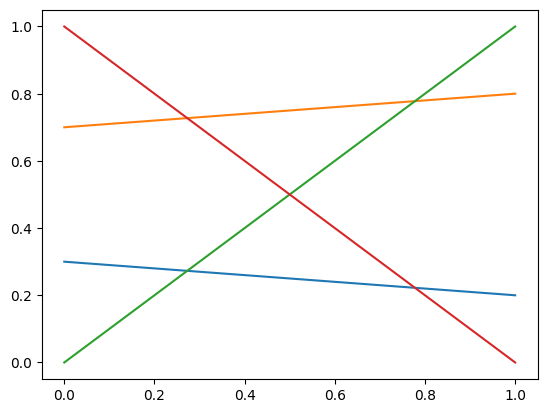

In [69]:
#minimax

M= 100
prior = np.linspace(0,1,M+1)

#accept rule
accept_cost = prior*(cost[0][0]*p0 + cost[1][0]*(1-p0)) + (1-prior)*(cost[1][1]*p1 + cost[0][1]*(1-p1))
#reject rule
reject_cost = prior*(cost[0][0]*(1-p0) + cost[1][0]*p0) + (1-prior)*(cost[1][1]*(1-p1) + cost[0][1]*p1)
#decide 1 rule
decide1_cost = prior*(cost[1][0]) + (1-prior)*(cost[1][1])
#decide 0 rule
decide0_cost = prior*(cost[0][0]) + (1-prior)*(cost[0][1])

#min cost  MIN
min_cost =  []
decision_rule = []         

for i in range(M+1):
    costs =  [decide1_cost[i],accept_cost[i],reject_cost[i],decide0_cost[i]]
    m = min(costs)
    min_cost.append(m)
    decision_rule.append(costs.index(m))

plt.plot(priors,accept_cost)
plt.plot(priors,reject_cost)
plt.plot(priors,decide1_cost)
plt.plot(priors,decide0_cost)


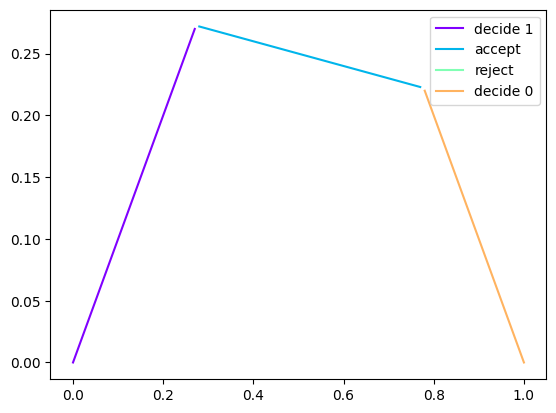

In [70]:
rules = ['decide 1','accept','reject','decide 0']
for color_index in range(4):
    ind = np.where(np.array(decision_rule)==color_index)[0]
    plt.plot(np.array(prior)[ind],np.array(min_cost)[ind],label=f'{rules[color_index]}',color=plt.cm.rainbow(color_index/4))
    plt.legend()

In [71]:
#MAX
max_cost=np.max(min_cost)
index = np.argmax(min_cost)
worst_prior = prior[index]

print(worst_prior)
print(max_cost)

0.28
0.272


In [72]:
rule1 = decision_rule[max(0,index-1)]
rule2 = decision_rule[min(M+1,index+1)]
p = 1

if rule1 == rule2:
    print(rules[rule1])
else:
    cost_0 = [decide1_cost[0],accept_cost[0],reject_cost[0],decide0_cost[0]]
    c1 = cost_0[rule1]
    c2 = cost_0[rule2]
    p = (max_cost - c2)/(c1 - c2)
    print(f"{rules[rule1]} rule with probability {p}")
    print(f"{rules[rule2]} rule with probability {1-p}")

decide 1 rule with probability 0.09333333333333341
accept rule with probability 0.9066666666666666


In [73]:
#detection

def decide(bit,rule):
    match rule:
        case 0:
            return 1
        case 1:
            return bit
        case 2:
            return abs(bit-1)
        case 3:
            return 0

detected_stream = []
for bit in noisy_bit_stream:
    if random.random() <= p:
        detected_stream.append(decide(bit,rule1))
    else:
        detected_stream.append(decide(bit,rule2))


In [74]:
#cost

cost_incurred = 0

for i in range(len(bit_stream)):
    cost_incurred = cost_incurred + cost[detected_stream[i]][bit_stream[i]]
        

print(cost_incurred/len(bit_stream))

0.2672
